# ISLR - Notes and take aways 

## Chapter 1

### Descriptive Analysis of Wage data (Quantitative Variable)

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.optimize as opt
import statistics as stats

In [15]:
# Readin wage data in our environment.
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Wage.csv"
df = pd.read_csv(url, error_bad_lines = False)

df.head()

,Unnamed: 0,Unnamed: 0.1,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,0,231655,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,1,86582,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2,161300,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,3,155159,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,4,11443,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


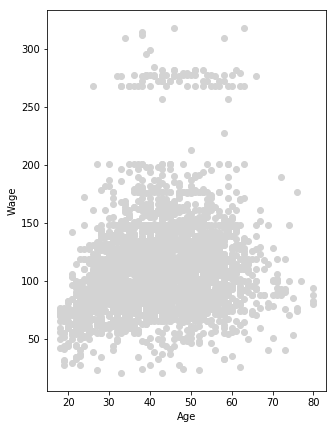

In [38]:
# Scatter plot of age and wage.
fig = plt.figure(figsize = (5,7))
plt.scatter(df.age, df.wage, color = "lightgrey")
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

In [85]:
#the plot above shows a lot of variance. We can fit a quadratic equation and see the trend
z = np.polyfit(df.age, df.wage, 5)
f = np.poly1d(z)
print(f)

            5             4           3         2
-9.157e-07 x + 0.0001835 x - 0.01265 x + 0.276 x + 3.993 x - 49.7


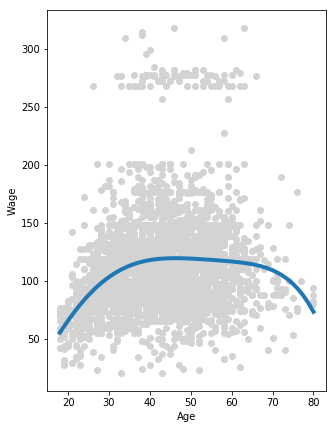

In [86]:
age_new = np.linspace(min(df.age), max(df.age), 50)
wage_new = f(age_new)

fig = plt.figure(figsize = (5,7))
plt.scatter(df.age, df.wage, color = "lightgrey")
plt.plot(age_new, wage_new, linewidth = 4.0)
plt.xlabel("Age")
plt.ylabel("Wage")
plt.show()

We can see that wage increase as the age increase and then stabilize and then start decreasing after age 60 approx.
But this curve also has a very high variablilty associated with it. So this variable alone cannot predict the wage.

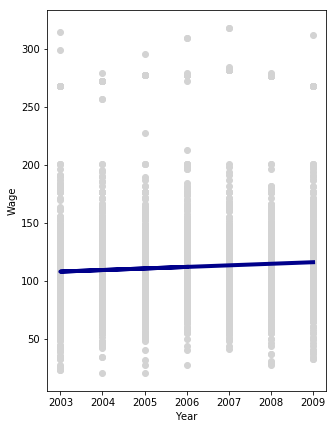

In [83]:
# Scatter plot of year and wage.
fig = plt.figure(figsize = (5,7))
plt.scatter(df.year, df.wage, color = "lightgrey")

z = np.polyfit(df.year, df.wage, 1)
f = np.poly1d(z)
plt.plot(df.year, f(df.year), linewidth = 4.0, color = "darkblue")
plt.xlabel("Year")
plt.ylabel("Wage")
plt.show()

The incresing linear trend shows that Year is associated with wage but the variablility associated makes it less relevant.

In [ ]:
df["education_level"] = df.education.str[:1]

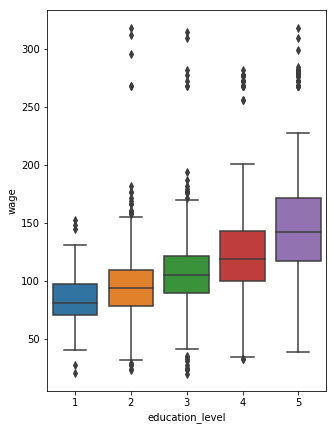

In [94]:
# Wage distribution across Education level.
fig = plt.figure(figsize = (5,7))
ax = sns.boxplot(x ="education_level", y = "wage", data = df)

This plot clearly shows the association of wages and education level. Increase in education level shows increase in wages as well.

For predicting the wages, we can combine the 3 variables that we have explored.
This kind of prediction of continous variable is called a __regression problem__.

### Descriptive analysis of stock data (Qualitative Variable)

In [99]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Smarket.csv"
Stock = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Stock.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
1,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
2,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
3,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
4,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
5,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


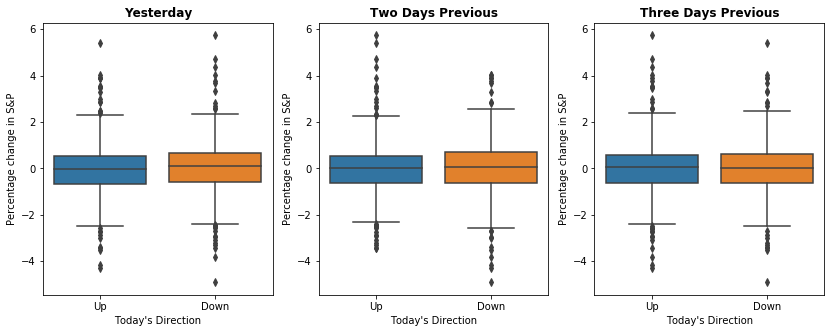

In [255]:
# Plotting of Lag variables across Direction variable to see the association.

plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
ax = sns.boxplot(x ="Direction", y = "Lag1", data = Stock)
ax.set_title("Yesterday", fontweight = "bold")
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")

plt.subplot(1,3,2)
ax = sns.boxplot(x ="Direction", y = "Lag2", data = Stock)
ax.set_title("Two Days Previous", fontweight = "bold")
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")

plt.subplot(1,3,3)
ax = sns.boxplot(x ="Direction", y = "Lag3", data = Stock)
ax.set_title("Three Days Previous", fontweight = "bold")
ax.set_ylabel("Percentage change in S&P")
ax.set_xlabel("Today's Direction")
plt.show()

Here we are looking at the problem wheather the stock will go up or down based on previous days change in stock value. This kind of problem is called __classification problem__.

The 2 box plots in all the plots seems identical. This means that simply using previous day's movement won't be very helpful in predicting today's direction.


## Chapter 2
## Statitical Learning 
 Tools to understand data

For a quantitative response __Y__ and __p__ different predictors $X_1, X_2,..., X_p$. 

We assume there is a relationship between Y and X = ($X_1$, $X_2$,..., $X_p$).
$$y = f(x) + \epsilon$$
$\epsilon$ is random error which is independent of X and mean 0.

Statistical learning refers to how to estimate __f__ .

For e.g. We can predict sales based on expenditure in advertising through different channels.
Then use this model to see how much each advertising expenditure of each channel is associated to sales.

In [122]:
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Advertising.csv"
Advertising = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Advertising.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


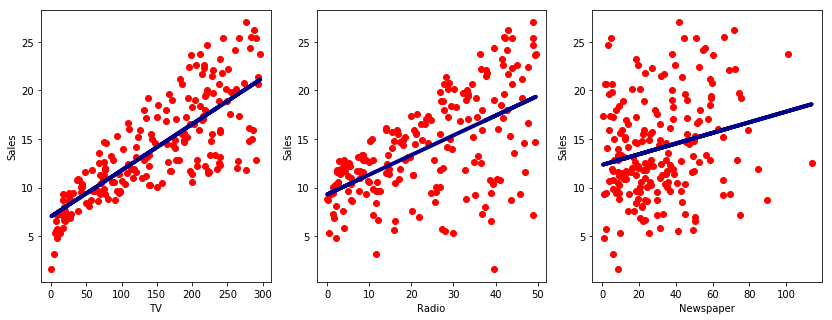

In [254]:
fig = plt.figure(figsize = (14,5))
plt.subplot(1,3,1)
ax = plt.scatter(Advertising.TV, Advertising.Sales,color = "red")

z = np.polyfit(Advertising.TV, Advertising.Sales, 1)
f = np.poly1d(z)
plt.plot(Advertising.TV, f(Advertising.TV), linewidth = 4.0, color = "darkblue")
plt.xlabel("TV")
plt.ylabel("Sales")

plt.subplot(1,3,2)
ax = plt.scatter(Advertising.Radio, Advertising.Sales,color = "red")

z = np.polyfit(Advertising.Radio, Advertising.Sales, 1)
f = np.poly1d(z)
plt.plot(Advertising.Radio, f(Advertising.Radio), linewidth = 4.0, color = "darkblue")
plt.xlabel("Radio")
plt.ylabel("Sales")

plt.subplot(1,3,3)
ax = plt.scatter(Advertising.Newspaper, Advertising.Sales,color = "red")

z = np.polyfit(Advertising.Newspaper, Advertising.Sales, 1)
f = np.poly1d(z)
plt.plot(Advertising.Newspaper, f(Advertising.Newspaper), linewidth = 4.0, color = "darkblue")
plt.xlabel("Newspaper")
plt.ylabel("Sales")
plt.show()

The above scatter plot shows the association of each of the channel expenditure with sales. The blue line shows the simple model that can be used to predict sales.

Another example :-

In [148]:
# Income data
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Income1.csv"
Income = pd.read_csv(url, error_bad_lines = False, index_col = 0)
Income.head()

,Education,Income
1,10.000000,26.658839
2,10.401338,27.306435
3,10.842809,22.132410
4,11.244147,21.169841
5,11.645485,15.192634


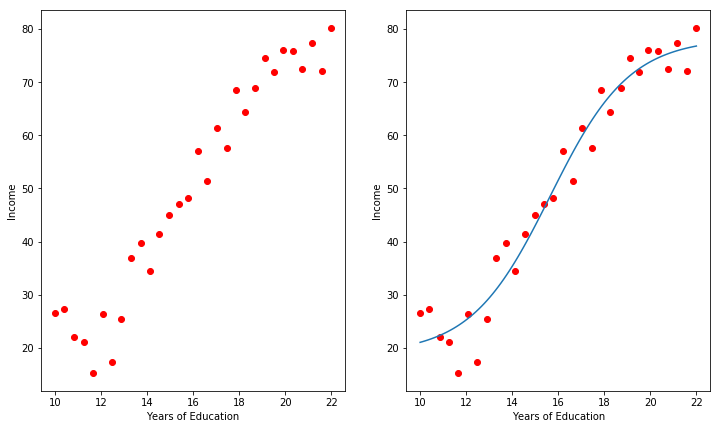

In [253]:
fig = plt.figure(figsize = (12,7))
plt.subplot(1,2,1)
plt.scatter(Income.Education, Income.Income, color = "red")
plt.xlabel("Years of Education")
plt.ylabel("Income")

# Optimizing the curve for the Income dataset
def f(x,b,c,d,e):
    return b/ (1+ np.exp(-(x-d)/e)) + c
    
(a,b,c,d) = opt.curve_fit(f, Income.Education, Income.Income, bounds = ([15,15,10,0],[80,80,22,10]))[0]

x_model = np.linspace(10, 22, 100)
y_model = f(x_model,a,b,c,d)
plt.subplot(1,2,2)
plt.scatter(Income.Education, Income.Income, color = "red")
plt.plot(x_model, y_model)
plt.xlabel("Years of Education")
plt.ylabel("Income")
plt.show()

We see a clear association between years of education and income. 
The blue line gives the relationship between the 2 variables.

The horizontal distance between the line and data points are the errors which have mean 0.

__Two reasons to estimate $f$__ :-

1. Prediction.
2. Inference.

__Prediction :-__
In many situation, a set of inputs X are readily available but the ouput Y cannot be easily obtained. In this setting, since the error term averages to zero, we can predict Y using 
$$\hat{y} = \hat f(X)$$
where $\hat f$ represents our estimates for $f$, and $\hat Y$ represents the resulting prediction for Y.

$\hat f$ is considered as a black box as we are not concerned with the exact form of $\hat f$, provided that it yields accurate predictions for y.

The accuracy of $\hat Y$ depends on quantities :-
1. Reducible Error.
2. Irreducible Error.

__Reducible Error__ :- In general, $\hat f$ will not be a perfect estimate for f, and this inaccuracy will introduce some error. This error is reducible because we can potentially improve the accuracy of $\hat f$ by using the most appropriate statistical learning technique to estimate f.

__Irreducible Error__ :- Y is also a function of $\epsilon$, which can not be predicted by X. Therefore, variablility associated with $\epsilon$ also effects the accuracy of the predictions. This is known as the irreducible error. These errors contain unmeasured variables, unmeasurable variations. Hence they are greater than 0.

$$E(Y-\hat Y)^2 = E[f(X) + \epsilon - \hat f(X)]^2$$
$$[f(X)- \hat f(X)]^2 + var(\epsilon)$$
$$Reducible + Irreducible$$

__Inference :-__ We are often interested in understanding how Y is affected by $X_1, X_2,..., X_p$ or how Y changes as a function of $X_1, X_2,..., X_p$. Also, relationship between the response and each predictor.

We wish to estimate $f$, but our goal is not necessarily to make a prediction for Y.

* Depending on the complexity of $f$, the relationship between the response and a given predictors may also change depends on the values of other predictors.

* Can the relationship between Y and and each predictorbe adequately summarized using a linear equation or is the relationship more complicated?

2 types of approaches to estimate f

1. Parametric.
2. Non-parametric.

__Parametric :-__ 2 step model approach.
1. Make an assumption about the functional form, or shape of $f$.
2. After a model has been selected, we need a procedure to fit or train the model.

__Advantages :-__ 
1. It simplifies the problem of estimating $f$ because it is generally much easier to estimate a set of parameters, such $\beta_0, \beta_1, \beta_2,..., \beta_p$ in the linear model, then it is to fit an entirely arbitrary function $f$.
2. Reduces overfitting.

__Disadvantages :-__ The chosen function form could be far from true functional form.

__Non-Parametric :-__ No assumption to the functional form. parametric methods advantages are non-parametric disadvantages.

If the purpose of study is inference, then restrictive models are much more interpretable.

__Regression v/s Classification problem.__

Variables:- 
1. Quantitative :- This case is called regression problem.
2. Qualitative(Categorical) :- This case is called classification problem.


### Assesing Model Accuracy

__1. Measuring the quality of fit :-__ To evaluate the performance of a statistical learning. MSE is a commonly used measures

$$MSE = \frac{1}{n} \sum_{i =1}^{n} (y_i - \hat f(x_i))^2$$

It is called _training MSE_ as it was computed using training data.

We want to choose a method that gives lowest _test MSE_, as opposed to the lowest _training MSE._ If we have a lot of test observation, we could compute 
$$Avg(y_0 - \hat f(x_0))^2$$

The method that provides lowest train MSE may not provide lowest test MSE.
$$Train\ MSE < Test\ MSE$$

A more restrictive and hence smoother curve has fewer degrees of freedom than a wiggly curve. Degrees of freedom summarize flexibility.

As the flexibility increase, the training MSE monotonically decrease. And the difference between test MSE and train MSE can be a measure of overfitting.

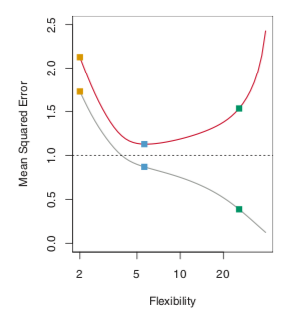

In [263]:
# An image from the book 
from IPython.display import Image
Image(filename = "/Users/ankittyagi/Desktop/ISLR Notes and codes/ISLR_Notes_codes/MSE Flexibility.png")

Regardless of wheather or not overfitting has occurred, we almost always expect the training MSE to be smaller than the test MSE because most methods tries to minimize the training MSE.

_Overfitting_ refers specifically to the case when a less flexibile method would have yielded a smaller test MSE.

__2. Bias-Variance Trade off__ :- The expected test MSE for a given value $x_0$ can always be decomposed into sum of three fundamental quantities: the variance of $\hat f(x_0)$, the squared _bias_ of $\hat f(x_0)$ and the variance of the error e.

$$E(y_0 - \hat f(x_0))^2 = Var(\hat f(x_0)) + [Bias(\hat f(x_0))]^2 + Var(e)$$

The left side is obtained by repeatedly estimating f using a large no. of training sets and tested each at $x_0$.

The overall test MSE can be obtained by averaging $E(y_0 - \hat f(x_0))^2$ over all possible values of $x_0$ in the test set.

In order to minimize expected test error, we need to select a statistical learning method that simultaneously achieves low bias and low variance. 
Now,
$$Var(\hat f(x_0)) > 0 \ and $$
$$[Bias(\hat f(x_0))]^2 > 0$$
Then, test MSE > Var(e) {irreducible error}

__Variance__ :-
1. It refers to amount by which $\hat f$ would change if we estimated it using a different training dataset.
2. If a method has high variance then small changes in training dataset can result in large changes in $\hat f$.
3. More flexible methods have higher variance. 

__Bias__ :- 
1. It refers to the error that is introduced by approximating a real life problem.
2. More flexible methods result in less bias.

Relative change of these 2 quantities decides whether the test MSE increase or decrease.

As we increase flexibility, the bias tends to initially decrease faster than the variance increases. Consequently, the expected test MSE declines.

However, at some point increasing flexibility has little impact on bias but start to significantly increase the variance.

### The Classification setting

In case, $y_i$ is an indicator variable
$$\frac{1}{n} \sum_{i = 1}^{n}I(y_i \neq \hat y_i)$$ is called the training error rate.

And the test error rate is 
$$Avg(I(y_0 \neq \hat y_0))$$

__Bayes Classifier__ :- This method assigns each observation to the most likely class, given its predictor values.
We should simply assign a test observation with predictor vector $x_0$ to the class j for which $$Pr(Y = j|X = x_0)$$ is largest. This classifier is called Bayes Classifier.

Bayes classifier corresponds to predicting class one if $Pr(Y = 1|X = x_0) > 0.5$ and class two otherwise.

The bayes classifier produces the lowest possible test error rate, called the Bayes error rate. Since the Bayes classifier will always choose the class for which $Pr(Y = 1|X = x_0)$ is largest, the error rate at X = $x_0$ will be $$1 - max_j Pr(Y = j|X = x_0)$$
In general, the average Bayes error rate is $$1 - E(max_j Pr(Y = j|X))$$
The Bayes error rate is analogous to the irreducible error.

__Bayes Classifier is a theoritical concept.__

#### K-Nearest Neighbours
Given a positive integer K and test observation $x_0$, the KNN classfier first identifies the K points in the training data that are closest to $x_0$ represented by $N_0$. It then estimates the conditional probability for class j as the fraction of the points in $N_0$ whose response values equals j:

$$Pr(Y = j|X = x_0)= \frac{1}{K} \sum_{i \epsilon N_0} I(y_i = j)$$
Finally, KNN applies Bayes rule and classifies the test observation $x_0$ to the class with the largest probability.

The choice of the value of K is important.
When K = 1, the decision boundary is overly flexible and finds pattern in the data that don't corresponds to the Bayes decision boundary.

When K = 1, Bias is low, variance is high. As K grows, method becomes less flexible and produce a decision boundary that is close to linear. This corresponds to a low variance but high bias classifier.

## Lab - Excercise in Python

In [2]:
# Reading Auto data into the environment
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Auto.csv"
Auto = pd.read_csv(url, error_bad_lines = False, na_values = '?')
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [14]:
# no. of rows and columns in the dataset
Auto.shape

(392, 9)

In [21]:
# Column names in the dataset
list(Auto.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year',
 'origin',
 'name']

In [16]:
# No. of missing values in the dataset.
Auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

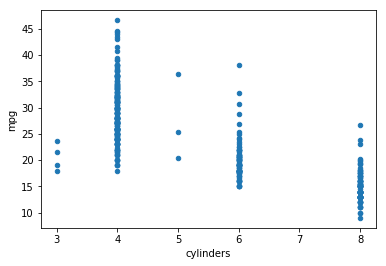

In [26]:
# Plotting cylinders vs mpg
Auto.plot.scatter(x = 'cylinders', y = 'mpg')

In [30]:
Auto.dtypes
# Cylinders is ordinal in nature so we will change it to factor

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [5]:
Auto['cylinders'] = Auto['cylinders'].astype('category')

In [6]:
Auto['cylinders'].dtypes

CategoricalDtype(categories=[3, 4, 5, 6, 8], ordered=False)

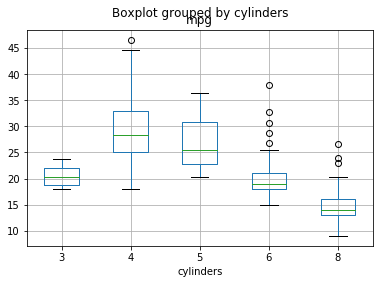

In [7]:
# Boxplot for mpg across cylinders
Auto.boxplot("mpg", by = "cylinders")

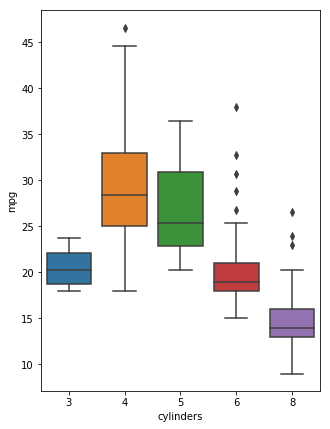

In [12]:
# We can create a better boxplot using seaborn.
fig = plt.figure(figsize = (5,7))
ax = sns.boxplot(x ="cylinders", y = "mpg", data = Auto)

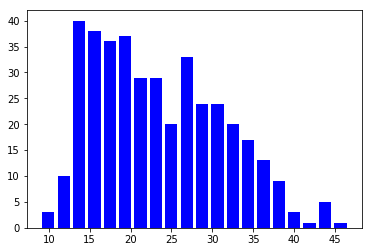

In [22]:
# We can plot a histogram 
plt.hist(Auto["mpg"], bins = 20, histtype = "bar", rwidth = 0.8, color = "b")
plt.show()

/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


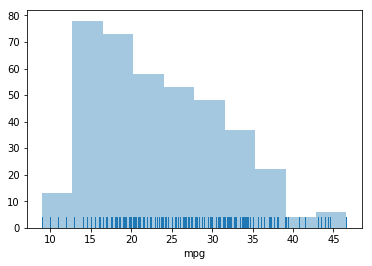

In [30]:
# We can also plot histogram using seaborn
sns.distplot(Auto["mpg"], bins = 10, kde = False, rug = True)

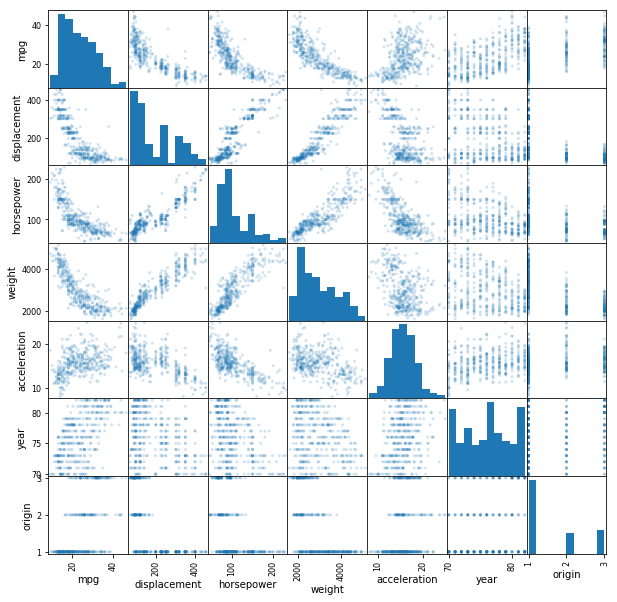

In [36]:
# A scatterplot matrix for all the variables can be created using pandas only
ax = pd.plotting.scatter_matrix(Auto, alpha = 0.2, figsize = (10,10))

In [42]:
# describe can give us the summary statistics for the dataset
Auto.describe(include = "all")

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.0,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,amc matador
freq,NaN,199.0,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,NaN,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,NaN,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,NaN,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,NaN,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,NaN,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,NaN,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


#### Conceptual Excercise

1.

    (a). A flexible method will yield better results as we have a lot of training examples so a better fit can be obtained without overfitting.

    (b). A flexible method might overfit as the no. of training examples are less.

    (c). If the relationship is not linear then a flexible method will be able to capture that.

    (d). If the variance is very high then the flexible method might capture the noise as well and might overfit.

2.

    (a). This is a regression problem as we have a continous target variable that we are trying to predict. Also, we are interested in inference. n = 500, p = 3.
    
    (b). It is a classification problem as we have a binary target variable that we are trying to predict. Also, we are interested in prediction. n = 20, p = 13.
    
    (c). This is a regression problem as we have a continous target variable that we are trying to predict. Also, we are interested in inference. n = 52, p = 3.
    
3. Squared bias will decrease quickly intially as we increase the flexibility but at some point the rate of decrease will become negligible.

Variance will increase slowly as we increase the flexibility but after certain level, it will start increasing exponentially.

Training error will keep on decreasing with increasing flexibility.

Test will decrease will decrease first but after some level it might start increasing or become stable.

Irreducible error will decrease because we might start including some variable that are effecting the target variable. But the decrease will be small.

4,5,6,7 are already described in the notes above.

#### Applied Excercises

In [13]:
#8.
# (a)/(b). Import College data
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/College.csv"
college = pd.read_csv(url, error_bad_lines = False, na_values = '?', index_col = 0) # first row of the table is the name of the university
college.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [14]:
#(c)(i). Summary of the dataset
college.describe(include = "all")

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


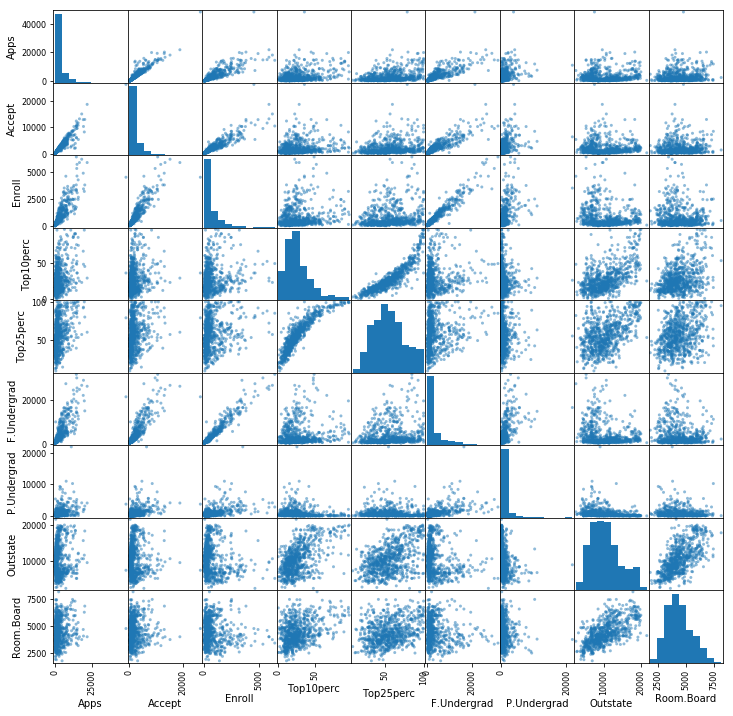

In [27]:
#(c)(ii).
ax = pd.plotting.scatter_matrix(college.iloc[:,:10], figsize = (12,12))

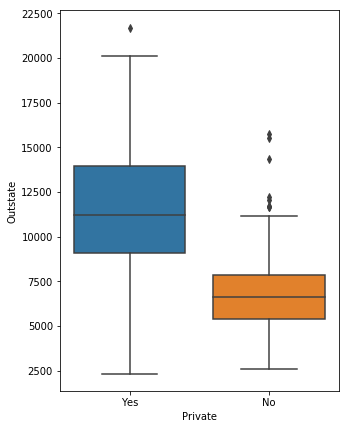

In [34]:
# (c)(iii). Boxplot of Oustate across Private
fig = plt.figure(figsize = (5,7))
ax = sns.boxplot(x = "Private", y = "Outstate", data = college )

In [38]:
# (c)(iv). Creating a new variable by binning an existing variable.
college["Elite"] = "No"
college.loc[college.Top10perc > 50, "Elite"] = "Yes"
# Frequency distribution can be obtained using value_counts()
college["Elite"].value_counts()

No     699
Yes     78
Name: Elite, dtype: int64

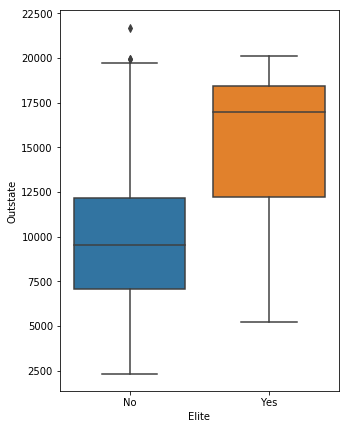

In [39]:
# (d)(v). Boxplot of Outstate versus Elite
plt.figure(figsize = (5,7))
ax = sns.boxplot(x = "Elite", y = "Outstate", data = college)

/Users/ankittyagi/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


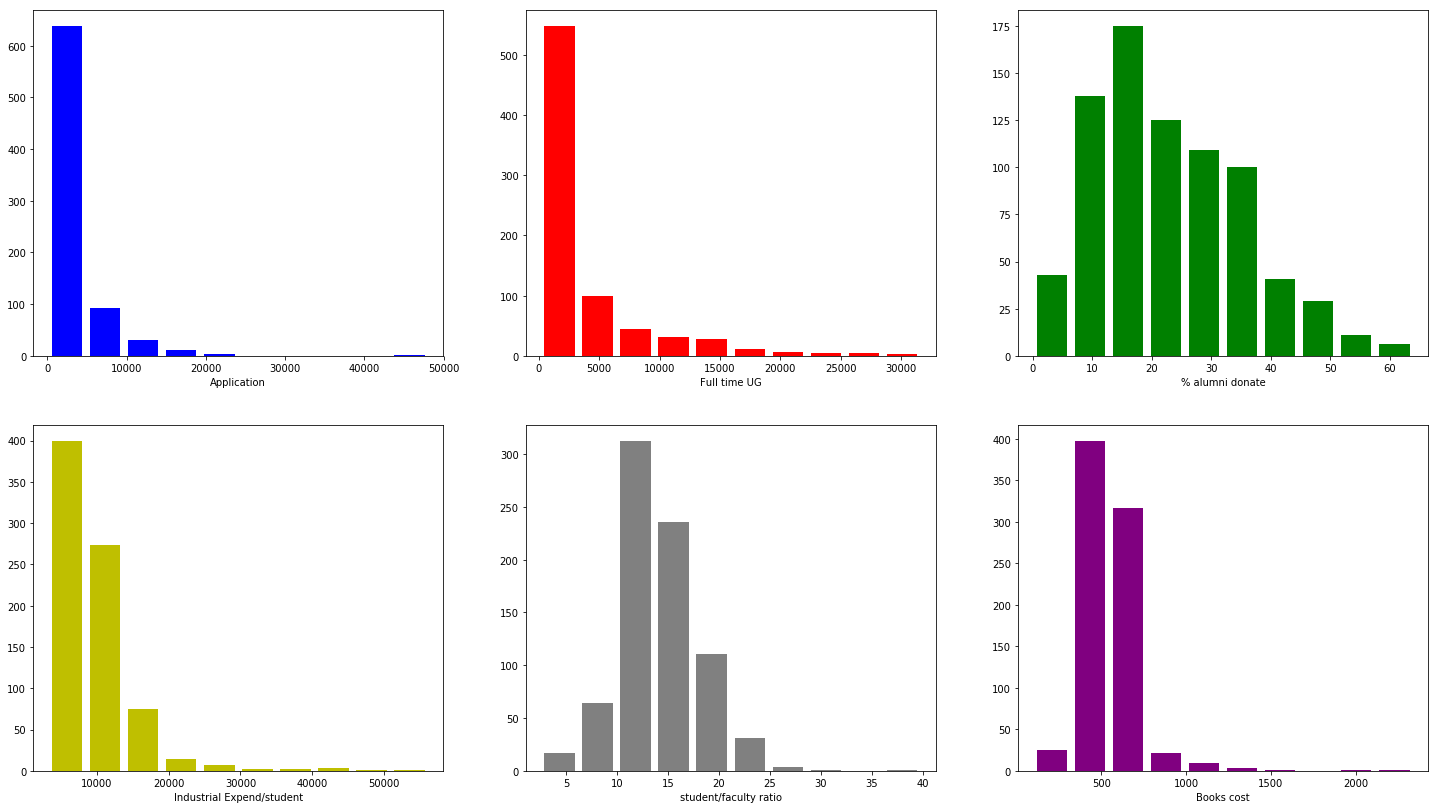

In [62]:
plt.figure(figsize = (25,14))
plt.subplot(2,3,1)
plt.hist(college["Apps"], histtype = "bar", rwidth = 0.8, color = "b")
plt.xlabel("Application")

plt.subplot(2,3,2)
plt.hist(college["F.Undergrad"], histtype = "bar", rwidth = 0.8, color = "r")
plt.xlabel("Full time UG")

plt.subplot(2,3,3)
plt.hist(college["perc.alumni"], histtype = "bar", rwidth = 0.8, color = "g")
plt.xlabel("% alumni donate")

plt.subplot(2,3,4)
plt.hist(college["Expend"], histtype = "bar", rwidth = 0.8, color = "y")
plt.xlabel("Industrial Expend/student")

plt.subplot(2,3,4)
plt.hist(college["Expend"], histtype = "bar", rwidth = 0.8, color = "y")
plt.xlabel("Industrial Expend/student")

plt.subplot(2,3,5)
plt.hist(college["S.F.Ratio"], histtype = "bar", rwidth = 0.8, color = "grey")
plt.xlabel("student/faculty ratio")

plt.subplot(2,3,6)
plt.hist(college["Books"], histtype = "bar", rwidth = 0.8, color = "purple")
plt.xlabel("Books cost")
plt.show()

In [3]:
# 9.(a).
Auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
# Cylinders and name is qualitative and the rest are quantitative.

In [9]:
# (b). Range of the data
Auto['cylinders'] = Auto['cylinders'].astype('category')
[{x:(max(Auto[x]),min(Auto[x]))} for x in list(Auto.columns) if Auto[x].dtypes != 'object']

[{'mpg': (46.6, 9.0)},
 {'cylinders': (8, 3)},
 {'displacement': (455.0, 68.0)},
 {'horsepower': (230, 46)},
 {'weight': (5140, 1613)},
 {'acceleration': (24.8, 8.0)},
 {'year': (82, 70)},
 {'origin': (3, 1)}]

In [14]:
# (c). Mean and standard deviation of the variable.
[{x:(round(stats.mean(Auto[x]),2),round(stats.stdev(Auto[x]),2))} for x in list(Auto.columns) if Auto[x].dtypes != 'object']

[{'mpg': (23.45, 7.81)},
 {'cylinders': (5.47, 1.71)},
 {'displacement': (194.41, 104.64)},
 {'horsepower': (104.47, 38.49)},
 {'weight': (2977.58, 849.4)},
 {'acceleration': (15.54, 2.76)},
 {'year': (75.98, 3.68)},
 {'origin': (1.58, 0.81)}]

In [21]:
# (d). 
Auto_reduced = Auto.drop(range(9,85,1), axis = 0)
[{x:(round(stats.mean(Auto_reduced[x]),2),round(stats.stdev(Auto_reduced[x]),2),(max(Auto_reduced[x]),min(Auto_reduced[x])))} 
 for x in list(Auto_reduced.columns) if Auto_reduced[x].dtypes != 'object']

[{'mpg': (24.4, 7.87, (46.6, 11.0))},
 {'cylinders': (5.37, 1.65, (8, 3))},
 {'displacement': (187.24, 99.68, (455.0, 68.0))},
 {'horsepower': (100.72, 35.71, (230, 46))},
 {'weight': (2935.97, 811.3, (4997, 1649))},
 {'acceleration': (15.73, 2.69, (24.8, 8.5))},
 {'year': (77.15, 3.11, (82, 70))},
 {'origin': (1.6, 0.82, (3, 1))}]

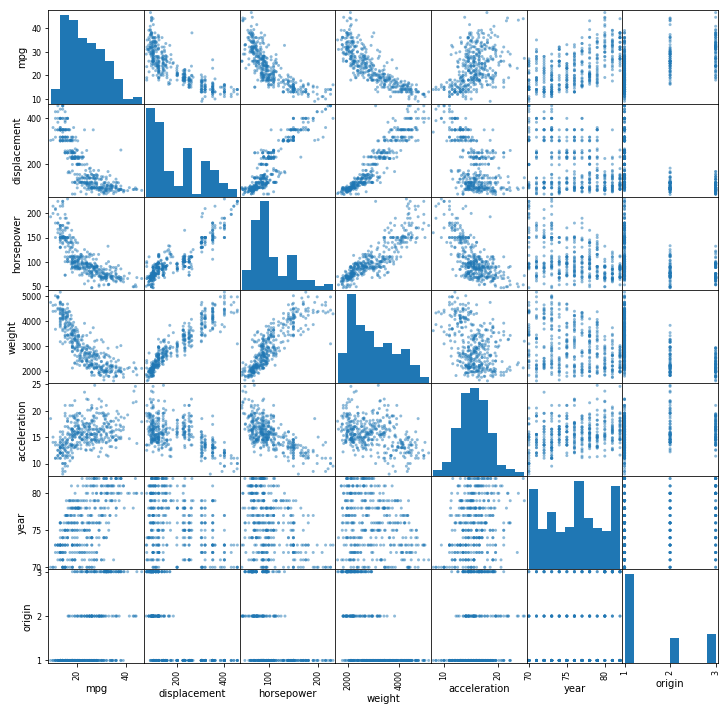

In [22]:
# (e). Exploring data
ax = pd.plotting.scatter_matrix(Auto.iloc[:,:8], figsize = (12,12))

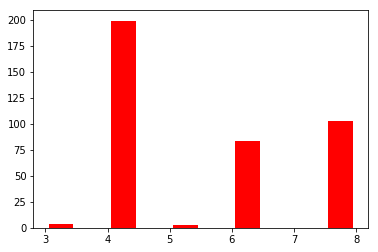

In [31]:
plt.hist(Auto["cylinders"], histtype = "bar", rwidth = 0.8, color = "r")
plt.show()

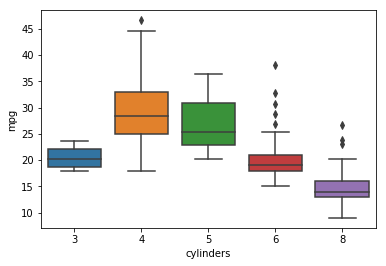

In [33]:
# (f). box plot of mpg across no. of cylinders
ax = sns.boxplot(x = 'cylinders', y = 'mpg', data = Auto)

 All the variables except origin and acceleration seems to be correlated with mpg. Accelration also shows some positive correlation (in the scatter plot).
 Also, cylinder and mpg boxplot also some non linear association between 2 variables.

In [44]:
# 10(a).
# Reading Boston data into the environment
url = "https://raw.githubusercontent.com/atystats/ISLR_Notes_codes/master/Datasets/Boston.csv"
Boston = pd.read_csv(url, error_bad_lines = False, na_values = '?', usecols = range(14))
Boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


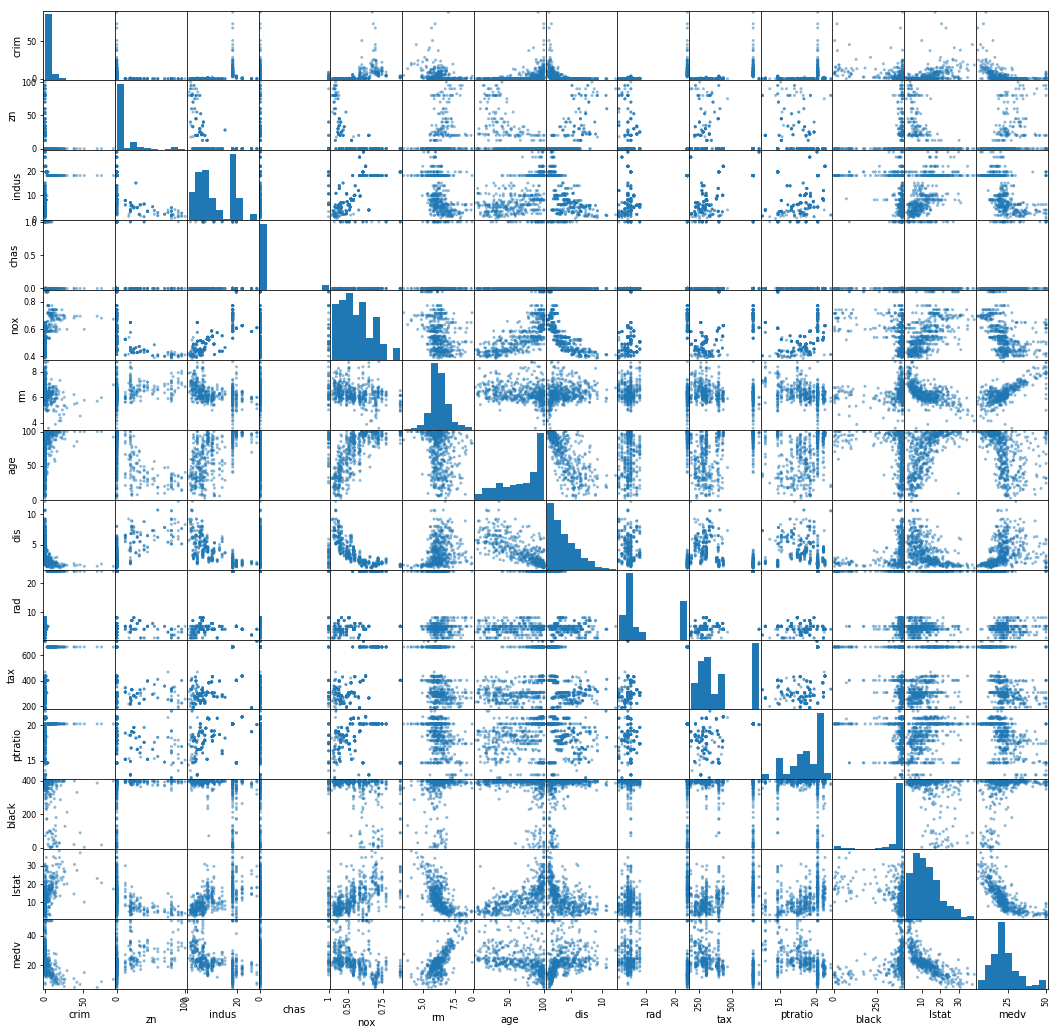

In [50]:
# (b). scatter plot matrix
ax = pd.plotting.scatter_matrix(Boston, figsize = (18,18))

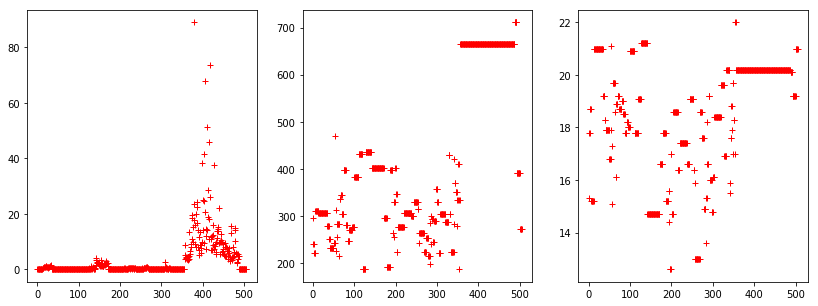

In [68]:
# (c). There is no strong correlation of the per capita crime rate with any of the variable. 
# But Charles River seems to have some association with per capita crime rate

# (d). We can do a frequency plot to see if there is a abnormal value in the variable.
plt.figure(figsize = (14,5))

plt.subplot(1,3,1)
plt.plot(Boston['crim'], 'r+')

plt.subplot(1,3,2)
plt.plot(Boston['tax'], 'r+')

plt.subplot(1,3,3)
plt.plot(Boston['ptratio'], 'r+')

plt.show()

In [69]:
# As we can see from above plots that we have some suburbs that have very high crime rate and tax rate. 
# In the pupil teacher ratio, there do not seems to have anomalies.

In [70]:
# (e).
# No. of suburbs that bounds the charles river.
Boston['chas'].sum()

35

In [75]:
# (f).
# Median value of the pupil teacher ratio.
stats.median(Boston['ptratio'])

19.05

In [92]:
# (g). Minimum median of home occupied. 
Boston[Boston['medv'] == min(Boston['medv'])]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666,20.2,396.90,30.59,5.0
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666,20.2,384.97,22.98,5.0


In [91]:
# minimum and maximum of all the columns.
dict = {'Minimum' :list(Boston.min()), 'Maximum': list(Boston.max())}
pd.DataFrame(dict, index = list(Boston.columns))

,Minimum,Maximum
crim,0.00632,88.9762
zn,0.00000,100.0000
indus,0.46000,27.7400
chas,0.00000,1.0000
nox,0.38500,0.8710
rm,3.56100,8.7800
age,2.90000,100.0000
dis,1.12960,12.1265
rad,1.00000,24.0000
tax,187.00000,711.0000


* Black proportion is very high in these 2 palces.
* tax is very high.
* Age of the suburbs is maximum among all.
* Bigresidential is not available.

In [97]:
# (h). Suburbs average more than seven rooms per dwelling
Boston[Boston['rm'] > 7].shape[0]

64

In [98]:
# Suburbs average more than eight rooms per dwelling
Boston[Boston['rm'] > 8].shape[0]

13

In [99]:
Boston[Boston['rm'] > 8]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
97,0.12083,0.0,2.89,0,0.4450,8.069,76.0,3.4952,2,276,18.0,396.90,4.21,38.7
163,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
224,0.31533,0.0,6.20,0,0.5040,8.266,78.3,2.8944,8,307,17.4,385.05,4.14,44.8
225,0.52693,0.0,6.20,0,0.5040,8.725,83.0,2.8944,8,307,17.4,382.00,4.63,50.0
226,0.38214,0.0,6.20,0,0.5040,8.040,86.5,3.2157,8,307,17.4,387.38,3.13,37.6
232,0.57529,0.0,6.20,0,0.5070,8.337,73.3,3.8384,8,307,17.4,385.91,2.47,41.7
233,0.33147,0.0,6.20,0,0.5070,8.247,70.4,3.6519,8,307,17.4,378.95,3.95,48.3
253,0.36894,22.0,5.86,0,0.4310,8.259,8.4,8.9067,7,330,19.1,396.90,3.54,42.8
257,0.61154,20.0,3.97,0,0.6470,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0


* Black people proportion is very high.
* lower status percentage is small.
* age is quite higher.